In [5]:
import json
import numpy as np
import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelForMaskedLM
from tqdm import tqdm
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

In [6]:
############# Build id2name #############
id2name = {}
for item in pd.read_csv('meta_34391.csv').values.tolist():
    id, name = item[0], item[1]
    if id in id2name: print(id)
    id2name[id] = name

oldid2newid = {} # trim empty ids
for new_id, old_id in enumerate(sorted(id2name.keys())): oldid2newid[old_id] = new_id

id2name = [id2name[id] for id in sorted(id2name.keys())]

############# Build user2ids #############
user2ids = {}
for item in pd.read_csv('events_854043.csv').values.tolist():
    user, id, time = item[0], oldid2newid[item[1]], item[2]
    if user not in user2ids: user2ids[user] = []
    user2ids[user].append((id, time))
for user in user2ids:
    user2ids[user] = sorted(user2ids[user], key=lambda x: x[1])
    user2ids[user], _ = zip(*user2ids[user])

1979376
4160708
/home/ubuntu/develop/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
print('# user:', len(user2ids), ',', '# movie:', len(id2name), ',', '# interaction:', sum([len(user2ids[user]) for user in user2ids]))
print('History:', stats.describe([len(user2ids[user]) for user in user2ids]))
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
print('# words in movie name:', stats.describe([len(name.split()) for name in id2name]))
print('# tokens in movie name:', stats.describe([len(tokenizer(name, add_special_tokens=False)['input_ids']) for name in id2name]))

# user: 39255 , # movie: 34389 , # interaction: 854043
History: DescribeResult(nobs=39255, minmax=(2, 2861), mean=21.75628582346198, variance=3456.9537725193118, skewness=12.253214762368781, kurtosis=308.6869075069097)
# words in movie name: DescribeResult(nobs=34389, minmax=(1, 20), mean=2.8361685422664222, variance=2.8835341853881884, skewness=1.5914757304292597, kurtosis=4.7485622666565455)
# tokens in movie name: DescribeResult(nobs=34389, minmax=(1, 46), mean=4.299863328389892, variance=6.920489977830738, skewness=1.9662864665999071, kurtosis=7.69409183041857)


In [21]:
def save_jsonl(data, filename):
    with open(filename, 'w') as fout:
        for item in data:
            fout.write(json.dumps(item) + '\n')

data = [{'user': user, 'ids': user2ids[user]} for user in user2ids]
save_jsonl(data, 'data.jsonl')
json.dump(id2name, open('id2name.json', 'w'))

In [27]:
user = 3
print([id2name[id] for id in user2ids[user]])
print(data[user - 2]['ids'], len(data[user - 2]['ids']))
print(user2ids[user], len(user2ids[user]))

['Blue Is the Warmest Colour', 'Still Life', 'American Hustle', 'Dallas Buyers Club', 'Hungry Hearts']
(22138, 22852, 19714, 14414, 25584) 5
(22138, 22852, 19714, 14414, 25584) 5


# Analyze Data

In [3]:
id2name = json.load(open('id2name.json'))
data = [json.loads(line) for line in open('data.jsonl')]

[('Man of Steel', 79), ('Gravity', 73), ('Now You See Me', 73), ('Captain Phillips', 54), ('World War Z', 54)]


<BarContainer object of 200 artists>

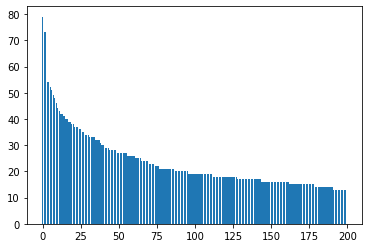

In [27]:
step = 10
names, freqs = zip(*Counter([id2name[item['ids'][step]] for item in data if len(item['ids']) > step]).most_common(200))
print(list(zip(names[:5], freqs[:5])))
plt.bar(range(len(freqs)), freqs)

In [30]:
[id2name[id] for id in data[2]['ids']]

['K-19: The Widowmaker',
 'Bachelorette',
 'The Great Gatsby',
 'Hyde Park on Hudson',
 'Identity Thief',
 'The Imitation Game']